# Causality Workshop 2025 - PNNL TechFest
## NOCAP introduction and Tutorial 
### August George and Jeremy Zucker

# Introduction: Causality for Bioengineering

* Engineer biological systems with novel capabilities (biofactories, sensors, therapeutics)

* Fill gaps in biological "parts list" and component functions

* Develop better mechanistic models despite messy data

* Leverage emerging experiments and causal analysis to advance the field


# Background: GRNs and Perturb-Seq

* Central dogma: DNA --> RNA --> Protein

* Gene Regulatory Networks (GRNs)
  * Node: gene expression, Edge: interaction

* Perturb-Seq: scRNAseq with CRISPR
  * Millions of cells, thousands of genes/cell
  * Measure RNA levels/cell
  * Perform soft interventions on genes


# NOCAP

* NOCAP: Network Optimization and Causal Analysis of Perturb-seq

* A toolkit to study perturb-seq data and gene regulatory networks (GRN) using causality

* Causal Workflow:
  * Build model
  * Simulate data and calibrate 
  * Causal queries



# Getting Started - Making a Model

* (Linear) Structural Causal Model: $X\rightarrow Y$; $Y = βX + ε$
  * Gene expression of Y, Gene expression of gene X, edge weight β, noise ε
  * Good first order approximation, but has limitations


### note: install NOCAP 
`pip install git+https://github.com/CRISPR-CARB/nocap.git`


In [1]:
# load modules for tutorial
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns
from IPython.display import display

import nocap

In [2]:
# loading E. coli tyrR subnetwork
tyrR_DAG = nx.read_gml("tyrR_filtered.gml")
tyrR_SCM = nocap.scm.generate_lscm_from_dag(tyrR_DAG)
display(f"Number of nodes in the DAG: {tyrR_DAG.number_of_nodes()}")
display(f"Number of edges in the DAG: {tyrR_DAG.number_of_edges()}")

print(tyrR_DAG.edges())

'Number of nodes in the DAG: 26'

'Number of edges in the DAG: 63'

[('soxR', 'aroF'), ('soxR', 'tyrA'), ('lrp', 'argR'), ('lrp', 'aroG'), ('lrp', 'mtr'), ('lrp', 'nac'), ('lrp', 'tyrP'), ('lrp', 'tyrR'), ('ihfA', 'folA'), ('ihfA', 'mtr'), ('ihfA', 'tyrP'), ('ihfB', 'folA'), ('ihfB', 'ihfA'), ('ihfB', 'mtr'), ('ihfB', 'tyrP'), ('cra', 'aroP'), ('trpR', 'aroL'), ('trpR', 'aroM'), ('trpR', 'mtr'), ('trpR', 'yaiA'), ('fnr', 'aroP'), ('fnr', 'nac'), ('fnr', 'soxR'), ('rpoD', 'argR'), ('rpoD', 'aroF'), ('rpoD', 'aroG'), ('rpoD', 'aroL'), ('rpoD', 'aroM'), ('rpoD', 'aroP'), ('rpoD', 'cpxR'), ('rpoD', 'fnr'), ('rpoD', 'folA'), ('rpoD', 'hupB'), ('rpoD', 'ihfB'), ('rpoD', 'lrp'), ('rpoD', 'mtr'), ('rpoD', 'soxR'), ('rpoD', 'trpR'), ('rpoD', 'tyrA'), ('rpoD', 'tyrB'), ('rpoD', 'tyrP'), ('rpoD', 'tyrR'), ('rpoD', 'yaiA'), ('argR', 'aroP'), ('glaR', 'aroP'), ('nac', 'aroF'), ('nac', 'hupA'), ('hupA', 'mtr'), ('hupA', 'tyrP'), ('tyrR', 'aroF'), ('tyrR', 'aroG'), ('tyrR', 'aroL'), ('tyrR', 'aroM'), ('tyrR', 'aroP'), ('tyrR', 'folA'), ('tyrR', 'mtr'), ('tyrR', 'tyrA

# Inspecting the Model
* Visualizing the causal graph and model equations

In [3]:
nocap.scm.plot_interactive_lscm_graph(tyrR_SCM)

In [4]:
display(nocap.scm.convert_to_latex(tyrR_SCM))

'$$cra = \\epsilon_{cra}$$\n $$rpoD = \\epsilon_{rpoD}$$\n $$glaR = \\epsilon_{glaR}$$\n $$cpxR = \\beta_{rpoD ->cpxR} rpoD + \\epsilon_{cpxR}$$\n $$fnr = \\beta_{rpoD ->fnr} rpoD + \\epsilon_{fnr}$$\n $$hupB = \\beta_{rpoD ->hupB} rpoD + \\epsilon_{hupB}$$\n $$ihfB = \\beta_{rpoD ->ihfB} rpoD + \\epsilon_{ihfB}$$\n $$lrp = \\beta_{rpoD ->lrp} rpoD + \\epsilon_{lrp}$$\n $$trpR = \\beta_{rpoD ->trpR} rpoD + \\epsilon_{trpR}$$\n $$soxR = \\beta_{fnr ->soxR} fnr + \\beta_{rpoD ->soxR} rpoD + \\epsilon_{soxR}$$\n $$ihfA = \\beta_{ihfB ->ihfA} ihfB + \\epsilon_{ihfA}$$\n $$argR = \\beta_{lrp ->argR} lrp + \\beta_{rpoD ->argR} rpoD + \\epsilon_{argR}$$\n $$nac = \\beta_{fnr ->nac} fnr + \\beta_{lrp ->nac} lrp + \\epsilon_{nac}$$\n $$tyrR = \\beta_{lrp ->tyrR} lrp + \\beta_{rpoD ->tyrR} rpoD + \\epsilon_{tyrR}$$\n $$hupA = \\beta_{nac ->hupA} nac + \\epsilon_{hupA}$$\n $$aroF = \\beta_{nac ->aroF} nac + \\beta_{rpoD ->aroF} rpoD + \\beta_{soxR ->aroF} soxR + \\beta_{tyrR ->aroF} tyrR + \\epsi

$$cra = \epsilon_{cra}$$
 $$rpoD = \epsilon_{rpoD}$$
 $$glaR = \epsilon_{glaR}$$
 $$cpxR = \beta_{rpoD ->cpxR} rpoD + \epsilon_{cpxR}$$
 $$fnr = \beta_{rpoD ->fnr} rpoD + \epsilon_{fnr}$$
 $$hupB = \beta_{rpoD ->hupB} rpoD + \epsilon_{hupB}$$
 $$ihfB = \beta_{rpoD ->ihfB} rpoD + \epsilon_{ihfB}$$
 $$lrp = \beta_{rpoD ->lrp} rpoD + \epsilon_{lrp}$$
 $$trpR = \beta_{rpoD ->trpR} rpoD + \epsilon_{trpR}$$
 $$soxR = \beta_{fnr ->soxR} fnr + \beta_{rpoD ->soxR} rpoD + \epsilon_{soxR}$$
 $$ihfA = \beta_{ihfB ->ihfA} ihfB + \epsilon_{ihfA}$$
 $$argR = \beta_{lrp ->argR} lrp + \beta_{rpoD ->argR} rpoD + \epsilon_{argR}$$
 $$nac = \beta_{fnr ->nac} fnr + \beta_{lrp ->nac} lrp + \epsilon_{nac}$$
 $$tyrR = \beta_{lrp ->tyrR} lrp + \beta_{rpoD ->tyrR} rpoD + \epsilon_{tyrR}$$
 $$hupA = \beta_{nac ->hupA} nac + \epsilon_{hupA}$$
 $$aroF = \beta_{nac ->aroF} nac + \beta_{rpoD ->aroF} rpoD + \beta_{soxR ->aroF} soxR + \beta_{tyrR ->aroF} tyrR + \epsilon_{aroF}$$
 $$aroG = \beta_{cpxR ->aroG} cpxR + \beta_{lrp ->aroG} lrp + \beta_{rpoD ->aroG} rpoD + \beta_{tyrR ->aroG} tyrR + \epsilon_{aroG}$$
 $$aroL = \beta_{rpoD ->aroL} rpoD + \beta_{trpR ->aroL} trpR + \beta_{tyrR ->aroL} tyrR + \epsilon_{aroL}$$
 $$aroM = \beta_{rpoD ->aroM} rpoD + \beta_{trpR ->aroM} trpR + \beta_{tyrR ->aroM} tyrR + \epsilon_{aroM}$$
 $$aroP = argR \beta_{argR ->aroP} + \beta_{cra ->aroP} cra + \beta_{fnr ->aroP} fnr + \beta_{glaR ->aroP} glaR + \beta_{rpoD ->aroP} rpoD + \beta_{tyrR ->aroP} tyrR + \epsilon_{aroP}$$
 $$folA = \beta_{ihfA ->folA} ihfA + \beta_{ihfB ->folA} ihfB + \beta_{rpoD ->folA} rpoD + \beta_{tyrR ->folA} tyrR + \epsilon_{folA}$$
 $$tyrA = \beta_{rpoD ->tyrA} rpoD + \beta_{soxR ->tyrA} soxR + \beta_{tyrR ->tyrA} tyrR + \epsilon_{tyrA}$$
 $$tyrB = \beta_{rpoD ->tyrB} rpoD + \beta_{tyrR ->tyrB} tyrR + \epsilon_{tyrB}$$
 $$yaiA = \beta_{rpoD ->yaiA} rpoD + \beta_{trpR ->yaiA} trpR + \beta_{tyrR ->yaiA} tyrR + \epsilon_{yaiA}$$
 $$mtr = \beta_{hupA ->mtr} hupA + \beta_{hupB ->mtr} hupB + \beta_{ihfA ->mtr} ihfA + \beta_{ihfB ->mtr} ihfB + \beta_{lrp ->mtr} lrp + \beta_{rpoD ->mtr} rpoD + \beta_{trpR ->mtr} trpR + \beta_{tyrR ->mtr} tyrR + \epsilon_{mtr}$$
 $$tyrP = \beta_{hupA ->tyrP} hupA + \beta_{hupB ->tyrP} hupB + \beta_{ihfA ->tyrP} ihfA + \beta_{ihfB ->tyrP} ihfB + \beta_{lrp ->tyrP} lrp + \beta_{rpoD ->tyrP} rpoD + \beta_{tyrR ->tyrP} tyrR + \epsilon_{tyrP}$$

# Model Simulation
* Generating synthetic perturb-seq data

,cra,rpoD,glaR,cpxR,fnr,hupB,ihfB,lrp,trpR,soxR,...,aroG,aroL,aroM,aroP,folA,tyrA,tyrB,yaiA,mtr,tyrP
0,0.000000,1.767013,0.000000,0.742542,0.000000,3.267303,1.372263,1.372324,0.183574,4.787927,...,4.584564,1.291812,3.035868,0.625930,2.611474,4.932743,5.030706,2.683338,3.762923,7.133096
1,0.000000,0.313778,1.261231,0.000000,0.000000,2.337684,0.000000,1.422742,1.183351,0.817809,...,1.030442,0.891788,3.169750,0.002315,1.069391,2.776434,0.082955,1.042746,3.335803,2.752568
2,0.000000,0.168471,0.060271,0.000000,2.295782,1.488667,1.772677,0.728090,0.000000,2.397382,...,2.455326,1.719170,0.821095,0.000000,0.885408,3.579869,1.369188,0.270279,1.886154,1.774305
3,0.916203,1.899131,0.000000,1.677083,0.814364,1.119273,2.805337,0.369148,1.608013,2.732093,...,5.286808,4.241427,3.531619,4.758165,3.605371,4.704911,5.050849,4.493262,1.017643,5.344816
4,0.000000,0.000000,0.364540,0.561557,0.000000,0.000000,0.710965,0.177868,0.000000,0.000000,...,0.000000,0.000000,0.152414,0.000000,1.590137,0.333478,0.000000,0.000000,1.483921,0.000000


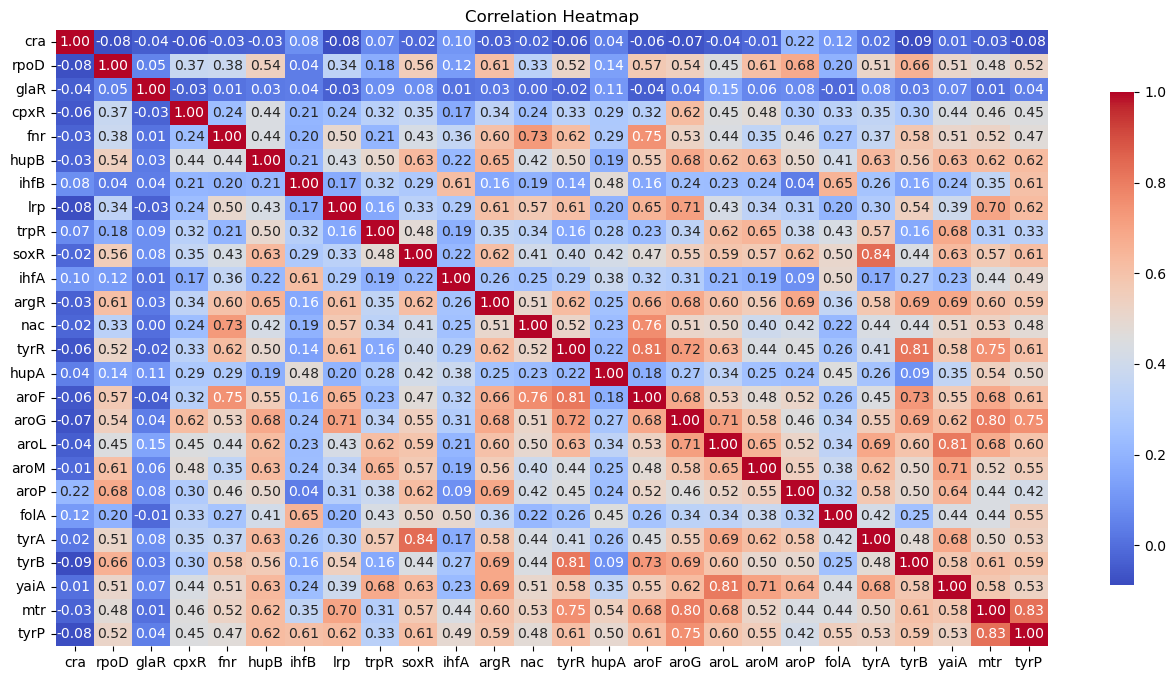

In [5]:
# Simulate data from the model
compiled_lgbn_model = nocap.scm.compile_lgbn_from_lscm(tyrR_SCM)  # Linear Gaussian Bayesian Network
simulated_data = nocap.simulate_data_with_outliers(compiled_lgbn_model, num_samples=1000)
display(simulated_data.head())

# Plot the heatmap
corr_matrix = simulated_data.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap")
plt.show()

# Model Calibration
* Learning model parameters from data
* Conditional probability distributions for each node are learned

In [6]:
# run inverse modeling (parameter estimation)
calibrated_lgbn_model = nocap.scm.fit_model(
    compiled_lgbn_model, simulated_data, backend="pgmpy", method="mle"
)
display(calibrated_lgbn_model.cpds)
simulated_data_after_calibration = nocap.simulate_data_with_outliers(
    calibrated_lgbn_model, num_samples=1000
)

[<LinearGaussianCPD: P(cra) = N(0.425; 0.418) at 0x32b120450,
 <LinearGaussianCPD: P(rpoD) = N(0.408; 0.391) at 0x32b1423d0,
 <LinearGaussianCPD: P(glaR) = N(0.388; 0.343) at 0x32b129dd0,
 <LinearGaussianCPD: P(cpxR | rpoD) = N(0.533*rpoD + 0.302; 0.688) at 0x32abd2cd0,
 <LinearGaussianCPD: P(fnr | rpoD) = N(0.7*rpoD + 0.316; 1.104) at 0x32ac3b1d0,
 <LinearGaussianCPD: P(hupB | rpoD) = N(1.358*rpoD + 0.55; 1.765) at 0x32b1bf390,
 <LinearGaussianCPD: P(ihfB | rpoD) = N(0.124*rpoD + 1.085; 4.135) at 0x32b170350,
 <LinearGaussianCPD: P(lrp | rpoD) = N(0.532*rpoD + 0.483; 0.84) at 0x32b1c4ad0,
 <LinearGaussianCPD: P(trpR | rpoD) = N(0.391*rpoD + 0.694; 1.803) at 0x32ac2d110,
 <LinearGaussianCPD: P(soxR | rpoD, fnr) = N(1.157*rpoD + 0.346*fnr + 0.302; 1.575) at 0x32b141010,
 <LinearGaussianCPD: P(ihfA | ihfB) = N(0.334*ihfB + 0.503; 0.765) at 0x32b165850,
 <LinearGaussianCPD: P(argR | rpoD, lrp) = N(1.187*rpoD + 0.756*lrp + -0.026; 1.19) at 0x32b11eb10,
 <LinearGaussianCPD: P(nac | fnr, lrp

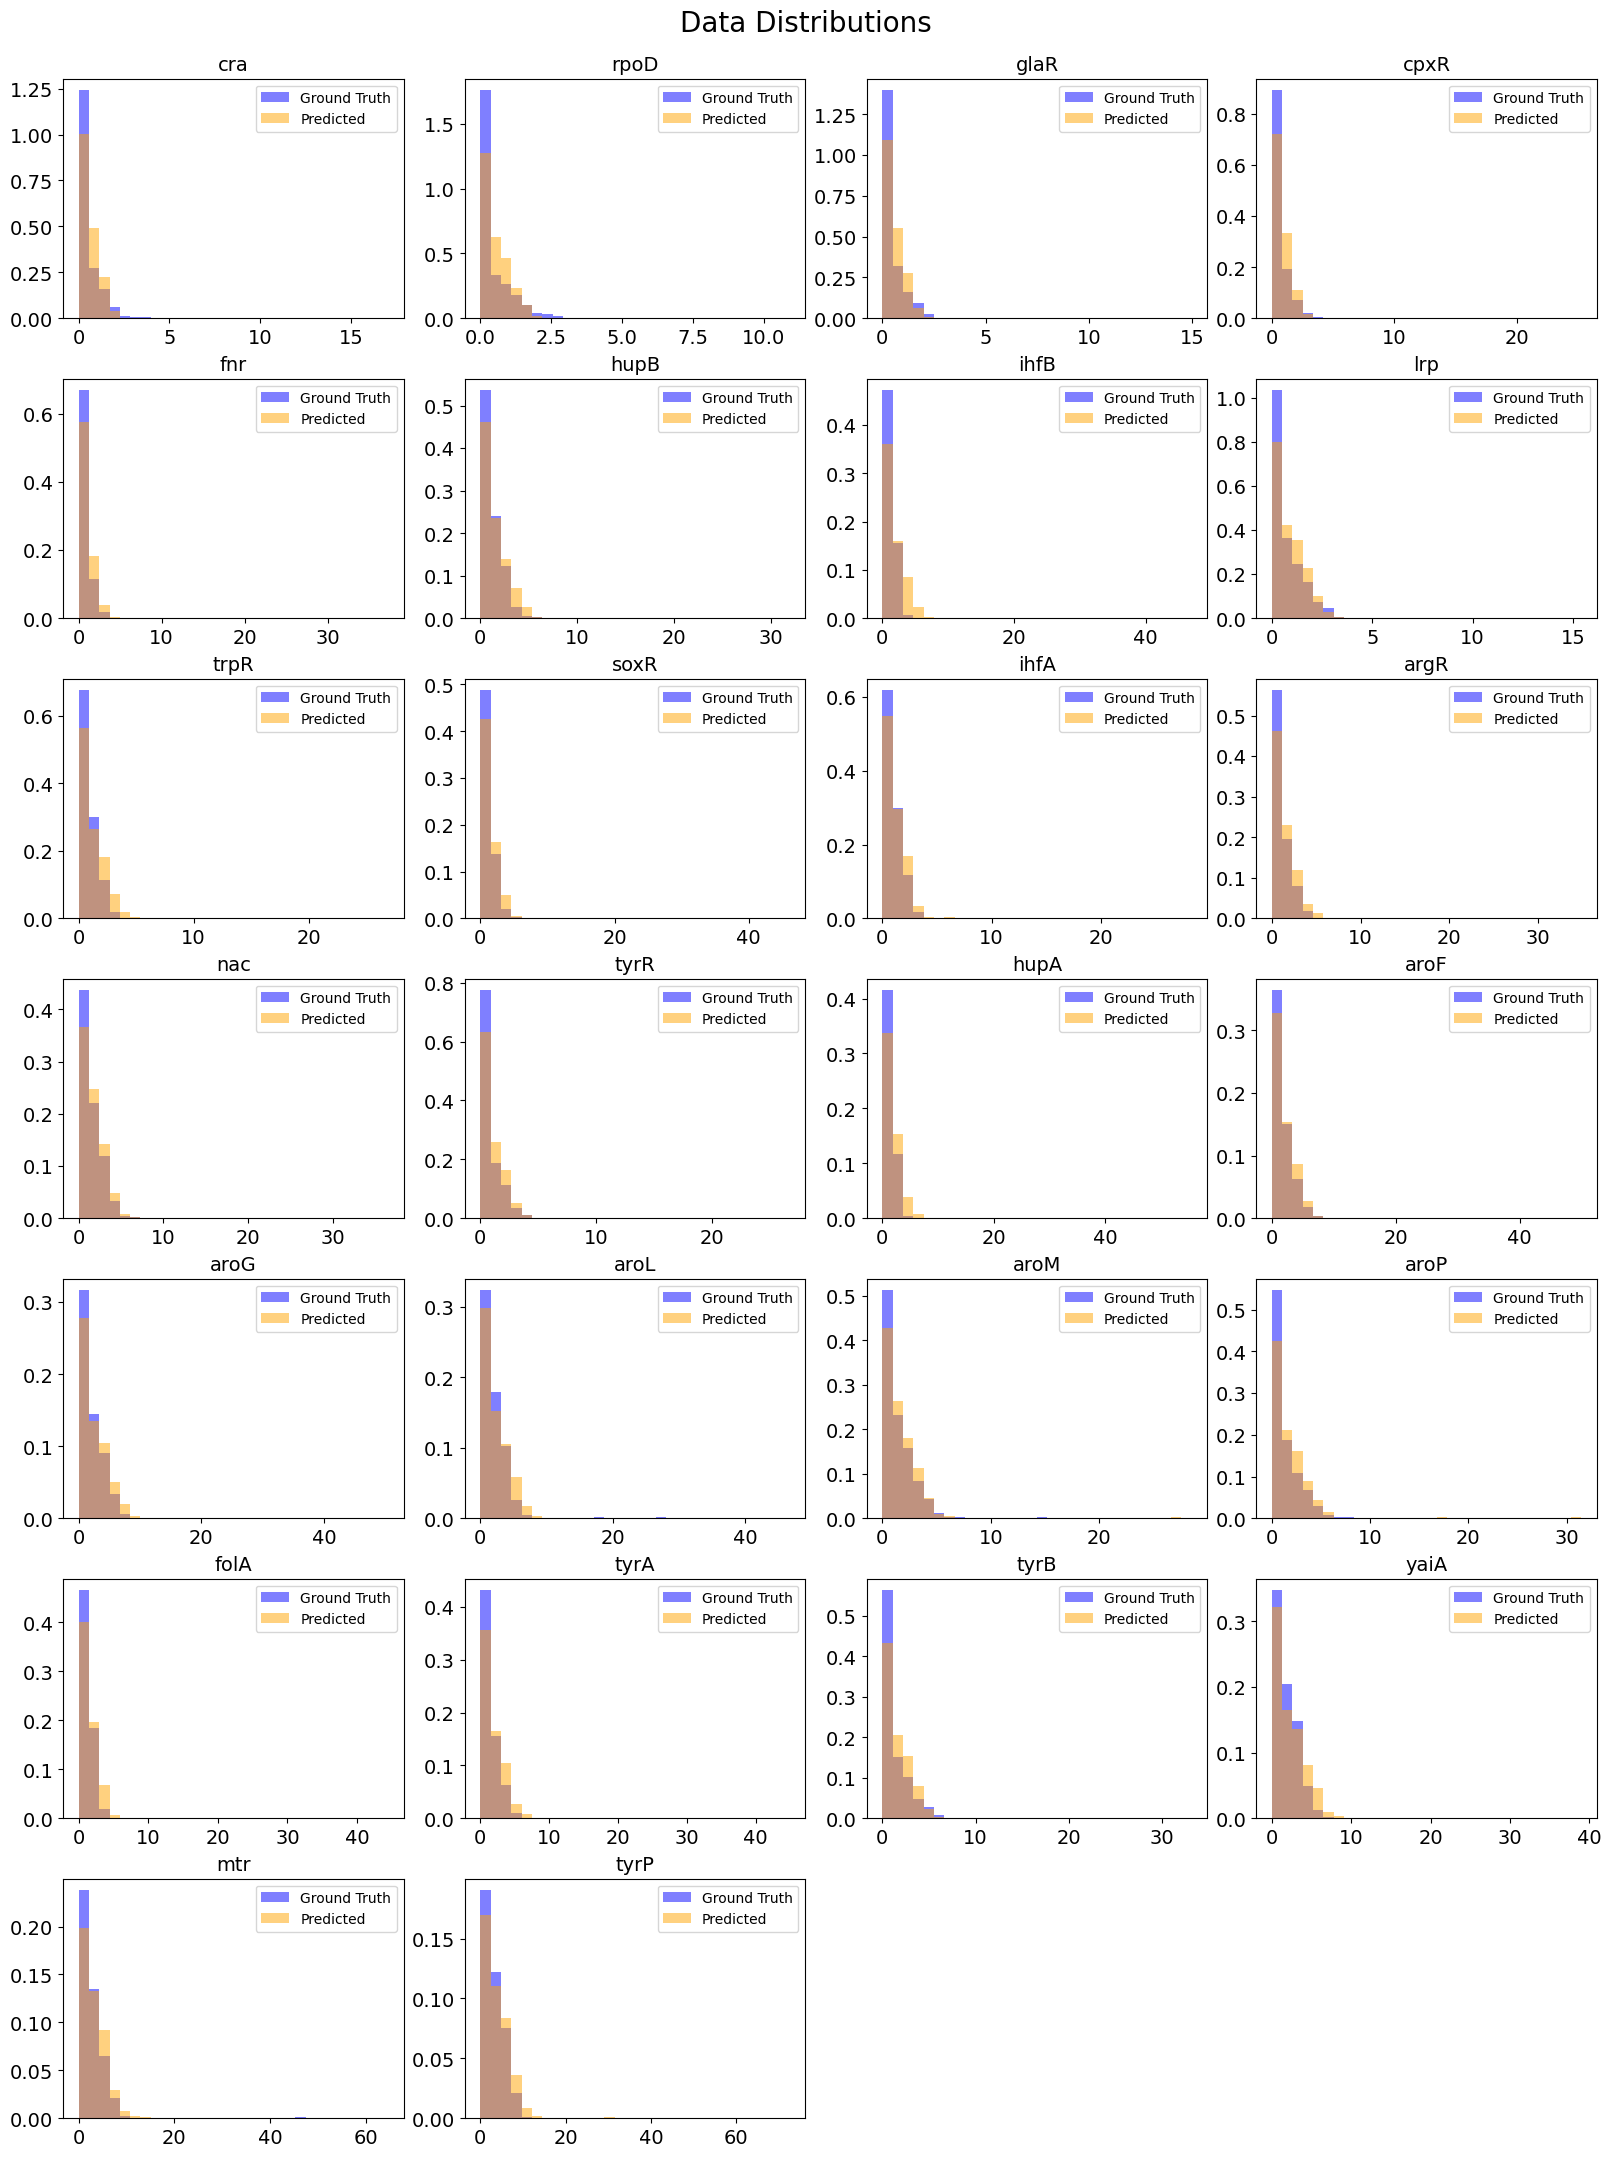

In [7]:
def plot_histograms(data1, data2, labels1, labels2, title="Data Distributions"):
    """
    Plots histograms for comparison between two datasets.

    Parameters:
    - data1, data2: Pandas DataFrame or similar structure for the datasets to be compared.
    - labels1, labels2: Labels for the datasets to use in plots.
    - title: Title of the plot.
    """
    num_cols = data1.shape[1]
    ncols = 4
    nrows = int(np.ceil(num_cols / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(4 * ncols, 3 * nrows), constrained_layout=True)

    for idx, col in enumerate(data1.columns):
        ax = axes.flat[idx]
        
        # Compute combined min/max for consistent bins
        data_min = min(data1[col].min(), data2[col].min())
        data_max = max(data1[col].max(), data2[col].max())
        bins = np.linspace(data_min, data_max, 31)

        ax.hist(data1[col], bins=bins, alpha=0.5, label=labels1, color="blue", density=True)
        ax.hist(data2[col], bins=bins, alpha=0.5, label=labels2, color="orange", density=True)
        
        ax.set_title(col)
        ax.legend()

    # Hide any unused subplots
    for j in range(idx + 1, nrows * ncols):
        axes.flat[j].set_visible(False)

    fig.suptitle(title, y=1.02, fontsize=20)
    
    # Adjust font sizes
    for ax in axes.flat:
        ax.title.set_fontsize(14)
        ax.xaxis.label.set_fontsize(12)
        ax.yaxis.label.set_fontsize(12)
        ax.tick_params(axis="both", labelsize=14)
        legend = ax.get_legend()
        if legend is not None:
            for text in legend.get_texts():
                text.set_fontsize(10)
    
    plt.show()

# Example usage:
plot_histograms(simulated_data, simulated_data_after_calibration, "Ground Truth", "Predicted")


# Investigating Intervention Effects
* Average Treatment Effect (ATE): 
    * Genetic activation of gene X has what ATE on gene Y?


In [8]:
# import copy
# import pgmpy
# import copy
# from pgmpy.models import LinearGaussianBayesianNetwork
# from pgmpy.factors.continuous import LinearGaussianCPD

# original_model = calibrated_lgbn_model
# dag = tyrR_DAG
# intervention_var = "tyrR"
# outcome_var = "tyrA"

# factor = 10  # Factor by which to increase the intercept

# cpds = [cpd.copy() for cpd in original_model.get_cpds()]

# target = intervention_var  # The variable we want to intervene on

# target_cpd = [cpd for cpd in cpds if cpd.variable == target][0]
# original_intercept = target_cpd.beta[0]
# new_intercept = original_intercept * factor
# new_beta = target_cpd.beta.copy()
# new_beta[0] = new_intercept
# updated_target_cpd = LinearGaussianCPD(target, new_beta, target_cpd.std, target_cpd.evidence)

# # Replace the old CPD with the updated CPD
# new_cpds = [updated_target_cpd if cpd.variable == target else cpd for cpd in cpds]

# new_model = LinearGaussianBayesianNetwork(dag)
# new_model.add_cpds(*new_cpds)

intervened_model = nocap.perform_soft_intervention_lgbn(calibrated_lgbn_model, tyrR_DAG, "tyrR", factor=10)


simulated_data_after_soft_intervention = nocap.simulate_data_with_outliers(
    intervened_model, num_samples=1000
)

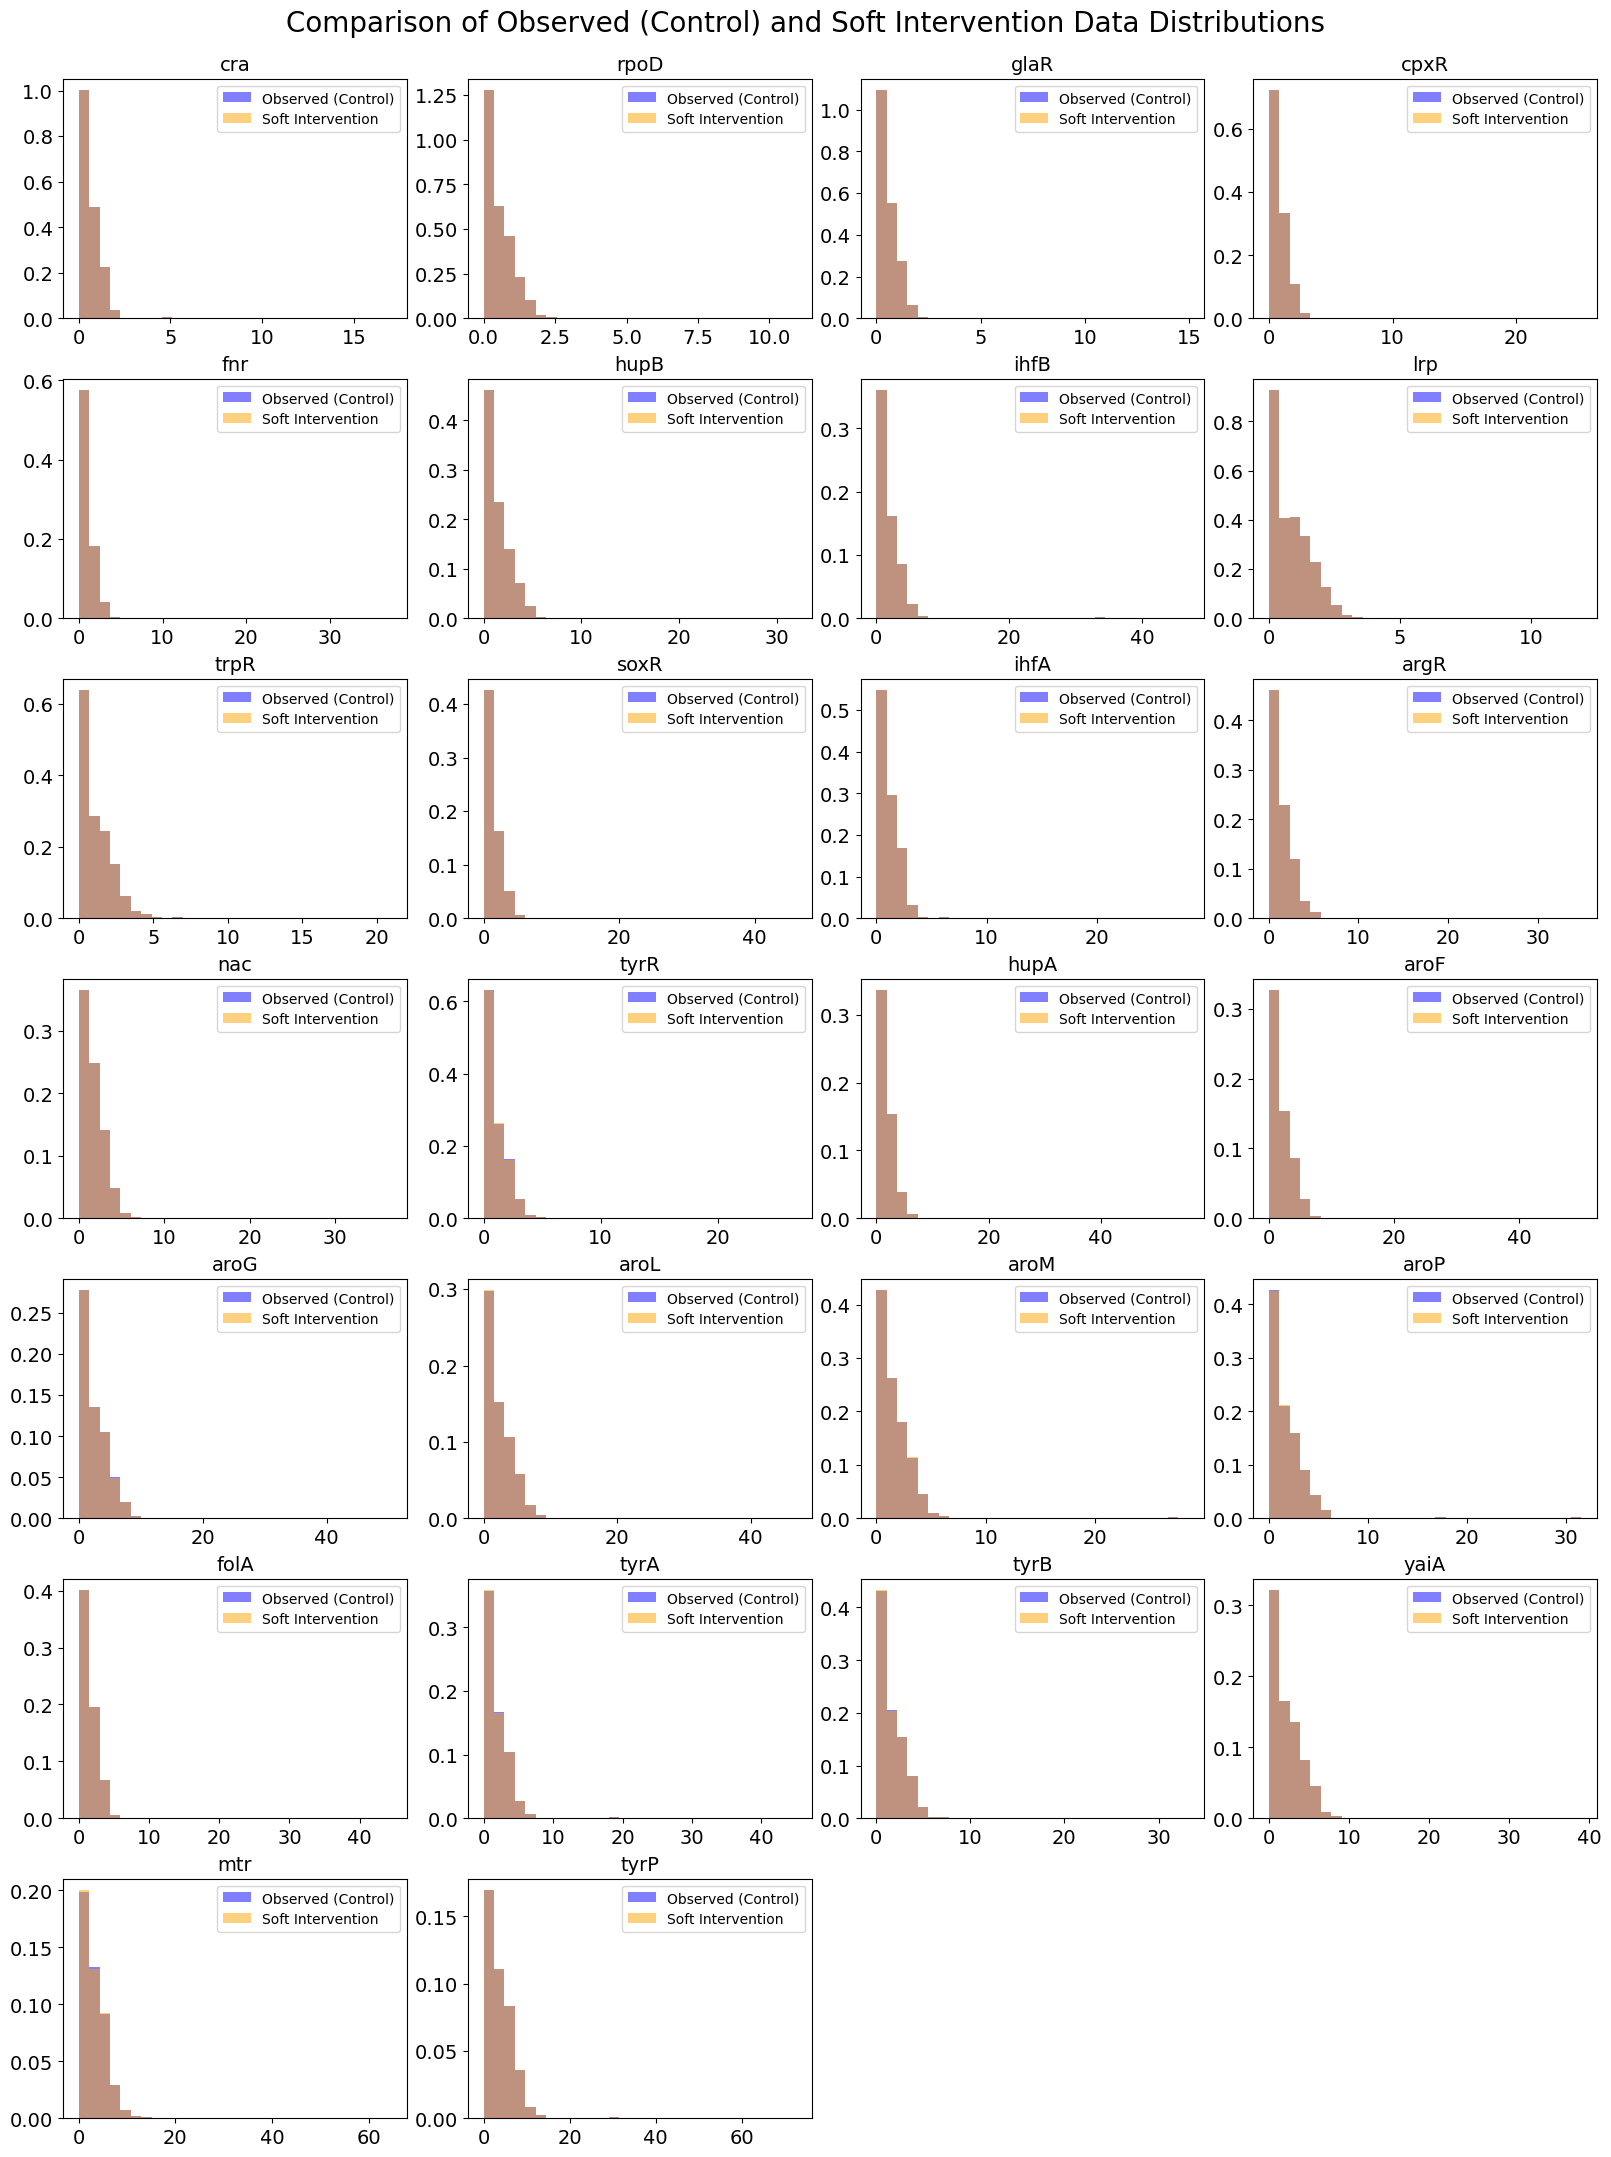

In [9]:
plot_histograms(
    simulated_data_after_calibration,
    simulated_data_after_soft_intervention,
    "Observed (Control)",
    "Soft Intervention",
    title="Comparison of Observed (Control) and Soft Intervention Data Distributions"
)

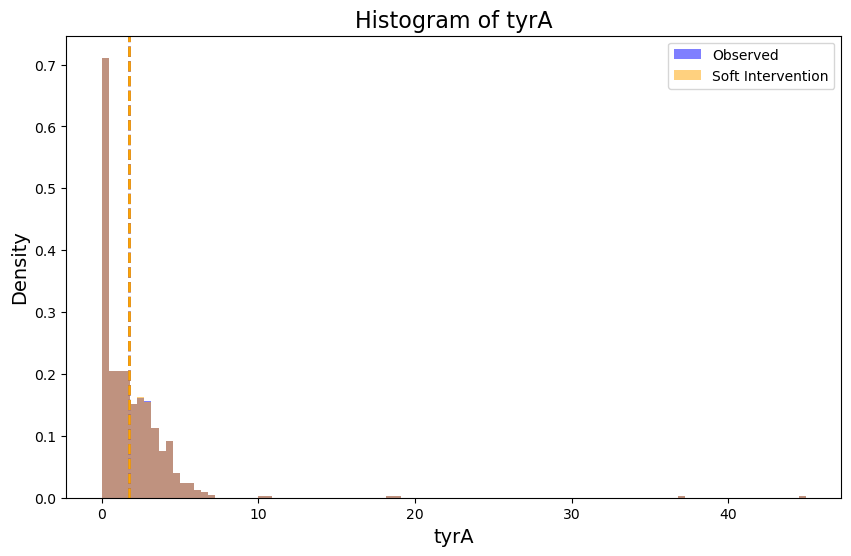

In [10]:
import matplotlib.pyplot as plt

def plot_variable_histogram(data1, data2, variable, label1, label2):
    """
    Plots histograms for a specific variable from two datasets and overlays their means and 3-sigma intervals.
    
    Parameters:
    - data1, data2: Pandas DataFrames containing the datasets.
    - variable: The specific variable/column to plot.
    - label1, label2: Labels for the datasets.
    """
    fig, ax = plt.subplots(figsize=(10, 6))

    # Extract the specified variable
    data1_var = data1[variable]
    data2_var = data2[variable]
    
    # Compute histogram bins
    data_min = min(data1_var.min(), data2_var.min())
    data_max = max(data1_var.max(), data2_var.max())
    bins = np.linspace(data_min, data_max, 100)

    # Plot histograms
    ax.hist(data1_var, bins=bins, alpha=0.5, label=label1, color="blue", density=True)
    ax.hist(data2_var, bins=bins, alpha=0.5, label=label2, color="orange", density=True)

    # Calculate means
    mean1 = data1_var.mean()
    mean2 = data2_var.mean()
    
    # Overlay means and 3-sigma lines
    ax.axvline(mean1, color='blue', linestyle='dashed', linewidth=2)
    ax.axvline(mean2, color='orange', linestyle='dashed', linewidth=2)

    # Set titles and labels
    ax.set_title(f'Histogram of {variable}', fontsize=16)
    ax.set_xlabel(variable, fontsize=14)
    ax.set_ylabel('Density', fontsize=14)
    ax.legend()

    plt.show()

# Example usage:
plot_variable_histogram(simulated_data_after_calibration, simulated_data_after_soft_intervention, 
                        "tyrA", "Observed", "Soft Intervention")


In [11]:
ATE, confidence_interval = nocap.scm.bootstrap_ATE(simulated_data_after_calibration,simulated_data_after_soft_intervention,'tyrA')
display(f"Average Treatment Effect (ATE): {ATE}")
display(f"95% Confidence Interval for ATE: {confidence_interval}")

'Average Treatment Effect (ATE): -0.00047547282000004465'

'95% Confidence Interval for ATE: (-0.22044475395101967, 0.2183895468393999)'

# Next Steps:

NOCAP is under active development:
* Analysis of dynamic time series data and interventions
* Causal model discovery and repair
* Robust probabilistic models with noise
* Additional backends

If you are interested in causality for single cell biology, please reach out!
* August George: august.george@pnnl.gov 
* Jeremy Zucker: jeremy.zucker@pnnl.gov 

GitHub: https://github.com/CRISPR-CARB/nocap 



# Thanks

NOCAP Team
* Mridula Gupta
* Yichao Han
* Narmadha Mohankumar
* Jeremy Zucker
* Alex Beliaev

Causality Workshop Team
* Shant Mahserejian
* Sabina Altus
* Caleb Warwick
* Winston Anthony

Funding:
* J.Z. and A.G. were supported in part by award number DE-SC0023091 under the DOE Biosystems Design program.
